In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go

sns.set_theme()  
%matplotlib inline

# L'introduzione ai dati

In [2]:
df = pd.read_csv('./Lezioni.csv')
df = df.drop('Unnamed: 0', axis=1)
df['Data'] = pd.to_datetime(df['Data'].astype(str), format='%Y-%m-%d')
df

,Index,Data,Ora,Professoressa,Livello,Lezione,Giorno della settimana,Mese,Anno
0,1,2023-05-22,8,Virginia,B1,B132,Lunedì,Maggio,2023
1,2,2023-05-22,11,Graziana,B1,B135,Lunedì,Maggio,2023
2,3,2023-05-23,10,Francesca,C1,C123,Martedì,Maggio,2023
3,4,2023-05-23,11,Sara,B1,B143,Martedì,Maggio,2023
4,5,2023-05-24,10,Alice,B1,B141,Mercoledì,Maggio,2023
...,...,...,...,...,...,...,...,...,...
204,205,2024-02-07,7,Miriam,C1,C129,Mercoledì,Febbraio,2024
205,206,2024-02-15,7,Miriam,B2,B238,Giovedì,Febbraio,2024
206,207,2024-02-19,7,Alice,C1,C111,Lunedì,Febbraio,2024
207,208,2024-02-22,10,Rita,B1,B112,Giovedì,Febbraio,2024


In [3]:
def guida(data_frame): # 14/02/2024
    righe, qnt_colonne = data_frame.shape
    quantita_righe = format(righe, ",").replace(',', '.')
    sequenza = list(range(qnt_colonne + 1))
    sequenza = sequenza[1:]

    colonne = data_frame.columns.to_list()
    types_list = [str(type(data_frame[col][0])).split("'")[1] for col in data_frame.columns]
    lista_categorie = [data_frame[col].nunique() for col in data_frame.columns]

    elementi_nulli = data_frame.isnull().sum()
    elementi_nulli = elementi_nulli.to_list()

    memory = (data_frame.memory_usage(deep=True) / (1024 ** 2)).round() # Mb
    memory_list = memory.to_list()
    memory_list = memory_list[1:]

    memory = data_frame.memory_usage(deep=True) # Totale Mb
    memory_totale = round(memory.sum() / (1024 ** 2), 2)

    percentuale_dati_nulli = round((data_frame.isnull().sum() / righe) * 100)
    percentuale_dati_nulli = percentuale_dati_nulli.to_list()

    data = pd.DataFrame({'Nome': colonne, 
                         'Tipo': types_list, 
                         'qunt_categorie': lista_categorie,
                         'Dati nulli' : elementi_nulli,
                         'Dati nulli %' : percentuale_dati_nulli,
                         'Memoria (Mb)': memory_list}, index=sequenza)
    
    # Intestazioni
    print('Teabella Esplorativa')
    print(f'In questi dati abbiamo {quantita_righe} righe e {qnt_colonne} colonne.')
    print(f'Consumassione di memoria: {memory_totale}Mb.')
    
    return data

guia_df = guida(df)
guia_df.head(10)

Teabella Esplorativa
In questi dati abbiamo 209 righe e 9 colonne.
Consumassione di memoria: 0.08Mb.


,Nome,Tipo,qunt_categorie,Dati nulli,Dati nulli %,Memoria (Mb)
1,Index,numpy.int64,209,0,0.0,0.0
2,Data,pandas._libs.tslibs.timestamps.Timestamp,142,0,0.0,0.0
3,Ora,numpy.int64,8,0,0.0,0.0
4,Professoressa,str,43,0,0.0,0.0
5,Livello,str,3,0,0.0,0.0
6,Lezione,str,86,0,0.0,0.0
7,Giorno della settimana,str,7,0,0.0,0.0
8,Mese,str,10,0,0.0,0.0
9,Anno,numpy.int64,2,0,0.0,0.0


# Le prime metriche

### Durata del periodo impostato

In [4]:
durata = (df['Data'].max() - df['Data'].min()).days
avvio = df['Data'].min().date()
fine = df['Data'].max().date()

totalie_lezioni = df['Index'].count()
print(f'In {durata} giorni abbiamo fatto {totalie_lezioni} lezioni. {round((totalie_lezioni/durata), 1)}')
print(f'Cominciato il {avvio} fino a {fine}')

In 277 giorni abbiamo fatto 209 lezioni. 0.8
Cominciato il 2023-05-22 fino a 2024-02-23


### Lezioni fatte ad ogni mese

C:\Users\Soldado\AppData\Local\Temp\ipykernel_10304\1031386987.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)
C:\Users\Soldado\AppData\Local\Temp\ipykernel_10304\1031386987.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mese.sort_values(valore).groupby(valore).count().apply(media).plot(figsize=[15,5])


<Axes: xlabel='Mese'>

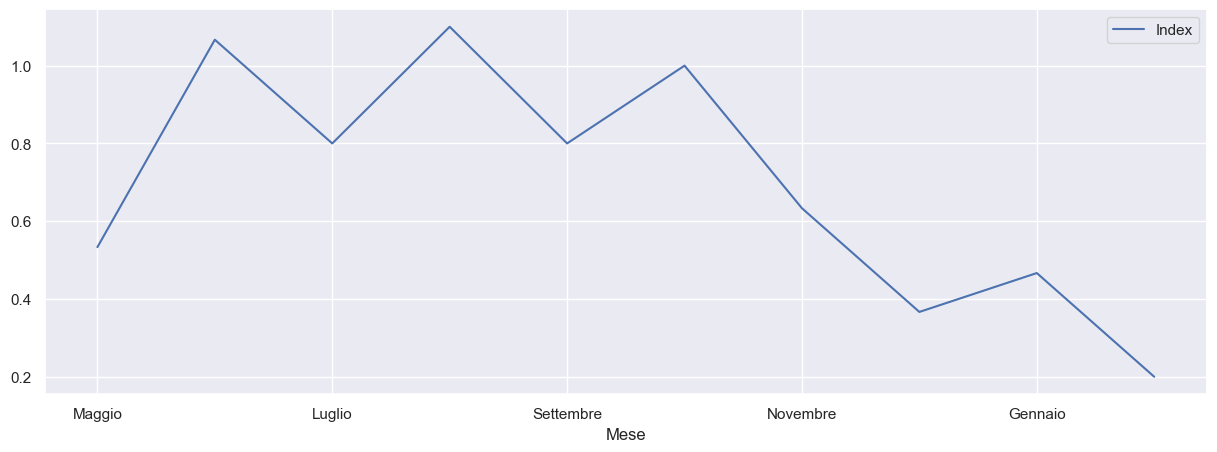

In [5]:
months_order = ['Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre',
       'Novembre', 'Dicembre', 'Gennaio', 'Febbraio']

valore = 'Mese'
df_mese = df[['Index', valore]]

def media(giorno):
    giorno = (giorno / 30) #* 100
    return giorno

df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)
df_mese.sort_values(valore).groupby(valore).count().apply(media).plot(figsize=[15,5])

In [6]:
df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)

C:\Users\Soldado\AppData\Local\Temp\ipykernel_10304\3296027273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)


In [7]:
def plot_line_chart(data, titolo, xtesto, ytesto):
    # Estrai i mesi e i valori dal dizionario
    months = list(data.keys())
    values = list(data.values())

    # Crea il grafico di linea con Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=months, y=values, mode='lines+markers', marker=dict(color='blue')))

    # Aggiungi etichette e titoli
    fig.update_layout(title=titolo,
                      xaxis_title=xtesto,
                      yaxis_title=ytesto)

    # Mostra il grafico
    fig.show()

In [8]:
(df.groupby('Mese')['Index'].count() / df['Index'].count() * 100).round()

Mese
Agosto       16.0
Dicembre      5.0
Febbraio      3.0
Gennaio       7.0
Giugno       15.0
Luglio       11.0
Maggio        8.0
Novembre      9.0
Ottobre      14.0
Settembre    11.0
Name: Index, dtype: float64

- Media

In [9]:
df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)
df_mese = df_mese.sort_values(valore).groupby(valore).count().apply(media)
percentuale = df_mese['Index'].mean()

print(f'\nAbbiamo circa {round((percentuale), 1)} lezioni al giorno\n')


Abbiamo circa 0.7 lezioni al giorno



C:\Users\Soldado\AppData\Local\Temp\ipykernel_10304\3441429450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)
C:\Users\Soldado\AppData\Local\Temp\ipykernel_10304\3441429450.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mese = df_mese.sort_values(valore).groupby(valore).count().apply(media)


### Metriche del mese

In [10]:
MESE = 'Febbraio'
#df[df['Mese'] == MESE]

In [11]:
df_mese = df[['Mese']]
media_mese = round((df_mese[df_mese['Mese'] == MESE].count() / 30), 1)
print(f'{MESE}: {media_mese}')

Febbraio: Mese    0.2
dtype: float64


In [12]:
from datetime import datetime

df_mese = df[df['Mese'] == MESE]
df_mese = df_mese['Data']

# Date dall'immagine
data = []
for x in df_mese:
    x = str(x)
    data.append(x[0:10])

# Conversione delle stringhe in oggetti datetime
oggetti_data = [datetime.strptime(data, "%Y-%m-%d") for data in data]
differenze = []

# Calcolo delle differenze in giorni
for i in range(len(oggetti_data)-1):
    delta = oggetti_data[i+1] - oggetti_data[i]
    #print(f"La differenza tra {data[i+1]} e {data[i]} è di {delta.days} giorni.")
    differenze.append(delta.days)

print(f'La media della differenza dei giorni tra le lezioni: {sum(differenze)/len(differenze)} giorni.')

La media della differenza dei giorni tra le lezioni: 4.4 giorni.


# Livello

In [13]:
ordine = ['Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 
     'Novembre', 'Dicembre', 'Gennaio', 'Febbraio', 'Marzo', 'Aprile']

In [14]:
B1 = df[df['Livello'] == 'B1']
B1 = (B1.groupby('Mese')['Index'].count()).round()
B1 = B1.to_dict()
B1 = {k: v for k, v in sorted(B1.items(), key=lambda item: ordine.index(item[0]))}

B2 = df[df['Livello'] == 'B2']
B2 = (B2.groupby('Mese')['Index'].count()).round()
B2 = B2.to_dict()
B2 = {k: v for k, v in sorted(B2.items(), key=lambda item: ordine.index(item[0]))}

C1 = df[df['Livello'] == 'C1']
C1 = (C1.groupby('Mese')['Index'].count()).round() # Ottenere il groupby
C1 = C1.to_dict() # Mettere allinterno di un dizionario
C1 = {k: v for k, v in sorted(C1.items(), key=lambda item: ordine.index(item[0]))} # Ordinare tutto in base ai mesi

In [15]:
# Dati per le due linee
x = ordine

y1 = list(C1.values())
y2 = list(B2.values())
y3 = list(B1.values())

# Creare il grafico di linea con due linee
fig = go.Figure()

# Aggiungere la prima linea con colore blu
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='C1', line=dict(color='lightseagreen')))

# Aggiungere la seconda linea con colore rosso
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name='B2', line=dict(color='lightskyblue')))

# Aggiungere la terza linea con colore verde
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines+markers', name='B1', line=dict(color='red')))

# Aggiungere etichette e titoli
fig.update_layout(title='Grafico dei livelli',
                  xaxis_title='Mesi',
                  yaxis_title='Valori')

# Mostrare il grafico
fig.show()

In [16]:
df_mese = df[['Index', 'Mese']]

def media(giorno):
    giorno = (giorno / 30) #* 100
    return giorno

Mese = df_mese.sort_values(valore).groupby(valore)['Index'].count().apply(media).round(1)
Mese = {k: v for k, v in sorted(Mese.items(), key=lambda item: ordine.index(item[0]))}

In [17]:
# Chiamata alla funzione con il dizionario Mese
plot_line_chart(Mese, '', '', '')